[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/allegheny-college-cmpsc-105-spring-2025/site/blob/main/code/voice_storytelling_activity.ipynb)

In [ ]:
# Here you will see an example of taking raw data and doing multiple steps of analysis
# with visualizations along the way. Each next step is motivated by the previous.
# This makes a narrative in visuals!

In [ ]:
# The data are originally from https://zenodo.org/records/1188976

# The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
# contains 7356 files (total size: 24.8 GB). The dataset contains 24
# professional actors (12 female, 12 male), vocalizing two lexically-matched
# statements in a neutral North American accent. Speech includes calm, happy,
# sad, angry, fearful, surprise, and disgust expressions, and song contains
# calm, happy, sad, angry, and fearful emotions. Each expression is produced at
# two levels of emotional intensity (normal, strong), with an additional neutral
# expression. All conditions are available in three modality formats: Audio-only
# (16bit, 48kHz .wav), Audio-Video (720p H.264, AAC 48kHz, .mp4), and Video-only
# (no sound).  Note, there are no song files for Actor_18.

# https://youtu.be/0rvNpbucZOg

In [ ]:
# Cochlear implant users often have difficulty
# distinguishing the gender of the person they are talking to on the phone
# when no visual cues are present. They feel a lack of control that builds
# over time. Doctors and cochlear implant manufacturers would like to find a
# solution to assist their patients' and customers. Part of the trouble is that
# the microchips that do processing on the implants are only able to process
# very basic features of the audio. The audio features that tend to encode male
# or female vocal chords are not basic features. Here we will try to undertand
# what might be going wrong on the audio chips. In a first step, we will take
# a computational approach to analyzing the audio with only simple audio,
# features like pitch, in order to identify possible classification errors.
# ...

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import soundfile
from IPython.display import Audio, display

In [2]:
# general setting for numpy

np.seterr(divide = 'ignore'); # 'warn'

In [18]:
# specify the file to explore
# set 01.wav at the end, or 02.wav, 03.wav etc

! wget https://github.com/allegheny-college-cmpsc-105-spring-2025/site/raw/refs/heads/main/data/data-RAVDESS-audio/19.wav &> /dev/null
! wget https://github.com/allegheny-college-cmpsc-105-spring-2025/site/raw/refs/heads/main/data/data-RAVDESS-audio/19.wav &> /dev/null

In [20]:
# Read in the data and apply transformations!

# set the filename
filename = '/content/19.wav'

y, fs = soundfile.read(filename)

In [21]:
# Can you tell who is talking?
Audio(y,rate=fs)

In [22]:
y[0:20]

array([ 6.10351562e-05,  3.05175781e-05,  3.05175781e-05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.05175781e-05, -3.05175781e-05,  0.00000000e+00, -3.05175781e-05,
       -3.05175781e-05, -3.05175781e-05, -3.05175781e-05, -3.05175781e-05,
       -6.10351562e-05, -3.05175781e-05, -3.05175781e-05, -3.05175781e-05])

In [23]:
# run some transformations with scipy and logarithmic scaling to get a better view
# of the audio

t = np.arange(len(y))/fs
F, T, Y = scipy.signal.stft(y, fs, nperseg=2048,  padded=True, noverlap=1024)
Y_dB = 20*np.log10(np.abs(Y)/np.amax(np.amax(np.abs(Y))));

In [24]:
# Controls for Visualizations

# change these as needed to explore the data up close or zoomed out
time_limit = (0, 4) # bounds on time range in seconds

# change these as needed to explore the data up close or zoomed out
amplitude_limit = (-0.6, 0.6) # bounds on audio sample height

# change these as needed to explore your data up close or zoomed out
freq_limit = (0, 24000) # bounds on pitch range in Hz

# update loudness threshold as needed for exploration
loudness_threshold = -20

# Summary
print("Summary for: ", filename)
print("----------------------")
print("time limit is ", time_limit)
print("amplitude limit is ", amplitude_limit)
print("frequency limit is ", freq_limit)
print("loudness threshold is ", loudness_threshold)


Summary for:  /content/19.wav
----------------------
time limit is  (0, 4)
amplitude limit is  (-0.6, 0.6)
frequency limit is  (0, 24000)
loudness threshold is  -20


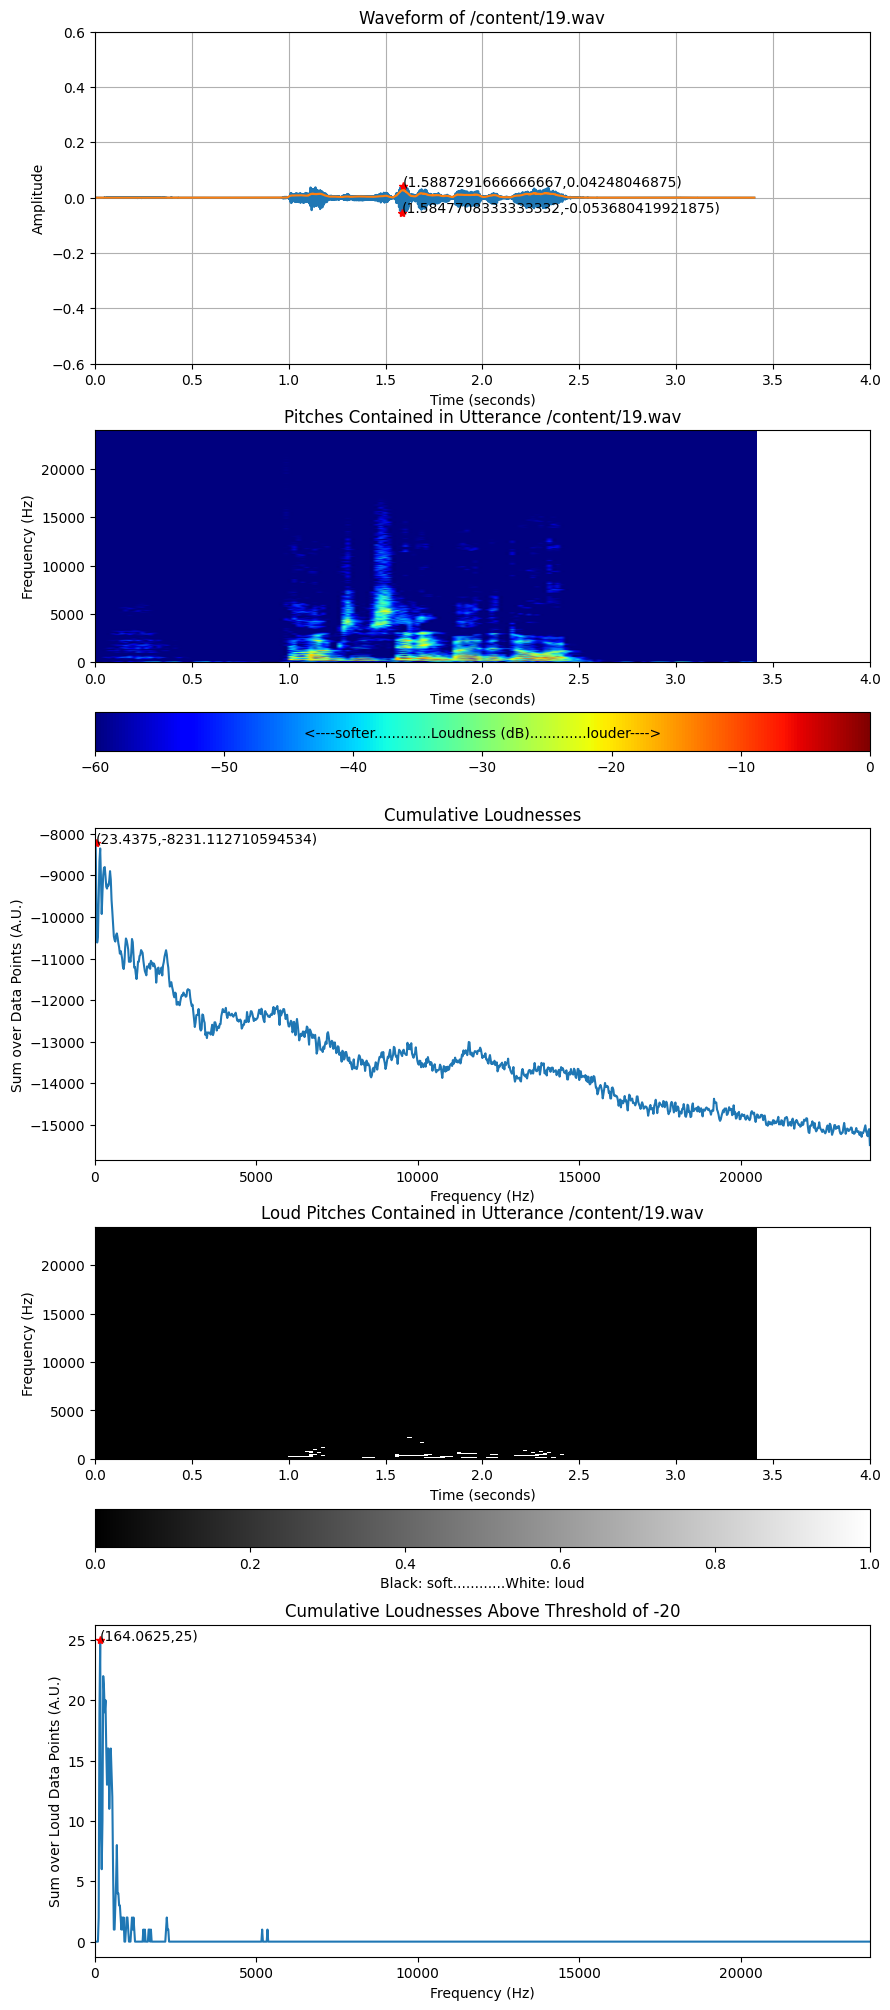

In [25]:
# Plotting

plt.close('all')

plt.figure(figsize=(10,5*5))

# Top Plot
plt.subplot(5,1,1)
plt.plot(t, y) # layer one, line plot
plt.grid()
plt.plot(t[np.argmin(y)], y[np.argmin(y)], 'r*');
plt.annotate(f"({t[np.argmin(y)]},{y[np.argmin(y)]})", (t[np.argmin(y)], y[np.argmin(y)]))
plt.plot(t[np.argmax(y)], y[np.argmax(y)], 'r*');
plt.annotate(f"({t[np.argmax(y)]},{y[np.argmax(y)]})", (t[np.argmax(y)], y[np.argmax(y)]))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Waveform of {filename}")
plt.xlim(time_limit)
plt.ylim(amplitude_limit)
plt.plot(t, np.sqrt(np.convolve(np.power(y,2), 0.001*np.ones(1000), mode="same")))

# 2nd Plot
plt.subplot(5,1,2)
plt.imshow(Y_dB,
           origin='lower',
           vmin = -60, vmax = 0,
           aspect='auto',
           cmap='jet',
           interpolation='spline16',
           extent=[T[0], T[-1], F[0], F[-1]])
cbar = plt.colorbar(location="bottom")
cbar.ax.set_xlabel('<----softer.............Loudness (dB).............louder---->', labelpad=-35)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Pitches Contained in Utterance {filename}")
plt.xlim(time_limit)
plt.ylim(freq_limit)

# 3rd Plot
spectrum_full = np.sum(Y_dB, axis=1)
plt.subplot(5,1,3)
plt.plot(F, spectrum_full)
plt.plot(F[np.argmax(spectrum_full)], spectrum_full[np.argmax(spectrum_full)], 'r*');
plt.annotate(f"({F[np.argmax(spectrum_full)]},{spectrum_full[np.argmax(spectrum_full)]})", (F[np.argmax(spectrum_full)], spectrum_full[np.argmax(spectrum_full)]))
plt.title(f"Cumulative Loudnesses")
plt.xlabel("Frequency (Hz)")
plt.xlim(freq_limit)
plt.ylabel("Sum over Data Points (A.U.)")

# 4th Plot
Y_dB_loud = Y_dB >= loudness_threshold
plt.subplot(5,1,4)
plt.imshow(Y_dB_loud,
           origin='lower',
           vmin = 0, vmax = 1,
           aspect='auto',
           cmap='gray',
           interpolation='None',
           extent=[T[0], T[-1], F[0], F[-1]])
cbar = plt.colorbar(location="bottom")
cbar.ax.set_xlabel('Black: soft............White: loud')
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Loud Pitches Contained in Utterance {filename}")
plt.xlim(time_limit)
plt.ylim(freq_limit)

# Bottom Plot
spectrum = np.sum(Y_dB_loud, axis=1)
plt.subplot(5,1,5)
plt.plot(F, spectrum)
plt.plot(F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)], 'r*');
plt.annotate(f"({F[np.argmax(spectrum)]},{spectrum[np.argmax(spectrum)]})", (F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)]))
plt.title(f"Cumulative Loudnesses Above Threshold of {loudness_threshold}")
plt.xlabel("Frequency (Hz)")
plt.xlim(freq_limit)
plt.ylabel("Sum over Loud Data Points (A.U.)")


# reaveal everything
plt.show()


## New Data generated from original Data

In [34]:
# The figures above have some salient peaks that are significant for understanding
# what might be going on with audio pitch processing in cochlear implants

# Below are some variables containing observations coming from the audio graphs
# The filename is the filename number
# max_abs_amplitude is the peak in the first figure
# most_common_freq is the peak in the third figure
# frequency_with_most_loud_moments is the peak in the fifth figure
# threshold_used is the setting selected before generating the figures
# vocal_gender is based on your judgment from listening without using cochlear implants
# vocal_emotion is happy or sad, based on your judgement from listening without using cochlear implants

# run the code above and record the data points for all 24 files!

! wget https://github.com/allegheny-college-cmpsc-105-spring-2025/site/raw/refs/heads/main/data/data-RAVDESS-audio/19.wav &> /dev/null

filenumber = [1,2,3,4,5,8,9,15,16,17,18,19,20,21,22,23]
max_abs_amplitude = [.127,.2402,.596,.262,.155,.6,.2,.1,.19,.324,.042,.025,.143,.16,.068,.057]
most_common_freq = [128,257,281,281,234,281,468,234,234,140,656,164,563,257,210,164,]
vocal_gender = [0,1,0,1,0,1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
vocal_emotion = [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]


In [38]:
# Assuming all the variables are filled out, reformat the data...
import pandas as pd

data = {'filename': filenumber,
        'max_abs_amplitude': max_abs_amplitude,
        'most_common_freq': most_common_freq,
        'vocal_gender': vocal_gender
        }

# pass data into a dataframe
df = pd.DataFrame(data)

# print the df
df

,filename,max_abs_amplitude,most_common_freq,vocal_gender
0,1,0.1270,128,0
1,2,0.2402,257,1
2,3,0.5960,281,0
3,4,0.2620,281,1
4,5,0.1550,234,0
5,8,0.6000,281,1
6,9,0.2000,468,0
7,15,0.1000,234,0
8,16,0.1900,234,1
9,17,0.3240,140,0


In [37]:
# Check the dimensions of the df
df.shape


(16, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b52d637dc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7b52d637f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b52d63ca1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b52d63f0d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b52d63f1810>],
 'means': []}

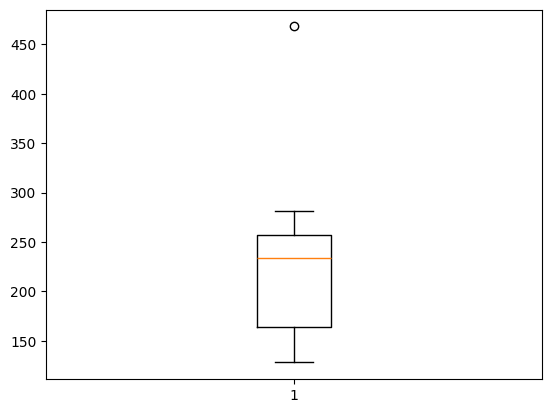

In [40]:
# TODO: plot trends with the variables
plt.figure()

plt.boxplot(df.most_common_freq[df.vocal_gender==0])


In [ ]:
# what seems to be the confusion in audio features?
# The inability to clearly visualize some graphs

In [ ]:
# visualize the answer as clearly as possible!